In [1]:
import tensorflow as tf
from IPython.display import SVG
from keras.utils import model_to_dot

In [2]:
from src.addons.watermark.models import create_watermark, create_extract_mark

---

# Watermaker

In [3]:
model = create_watermark((512, 512, 3), (32, 32, 1), 1.)

2023-12-17 19:18:45.525409: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-17 19:18:45.525428: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-17 19:18:45.525431: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-17 19:18:45.525461: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-17 19:18:45.525474: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 xor_scramble_layer (XORScr  (None, 32, 32, 1)            0         ['input_1[0][0]']             
 ambleLayer)                                                                                      
                                                                                                  
 rescaling (Rescaling)       (None, 512, 512, 3)          0         ['input_2[0][0]']         

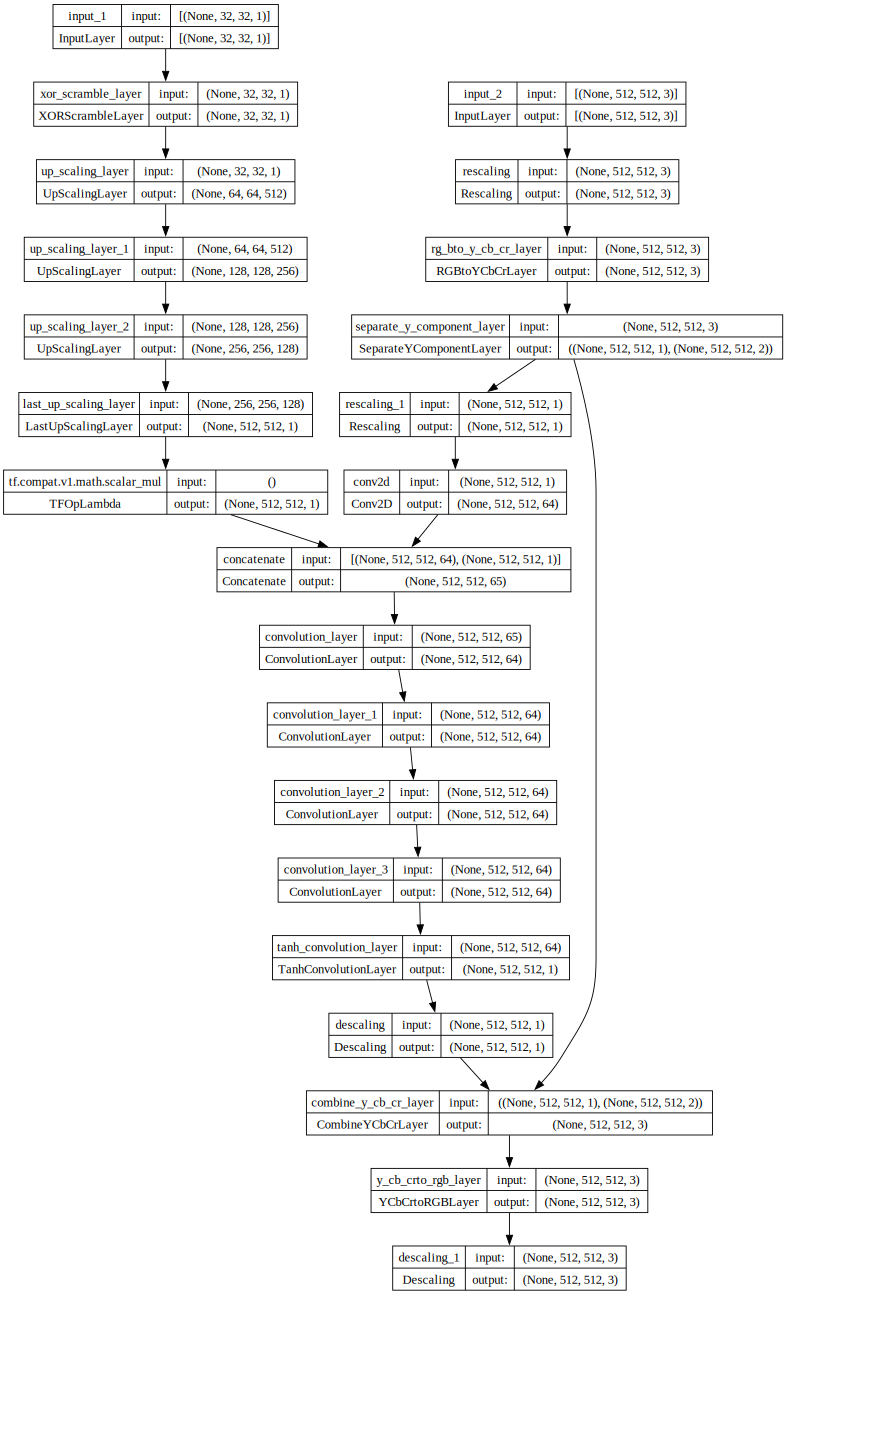

In [5]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

# Extraction of watermark

In [6]:
model = create_extract_mark((512, 512, 3))

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 rg_bto_y_cb_cr_layer_1 (RG  (None, 512, 512, 3)       0         
 BtoYCbCrLayer)                                                  
                                                                 
 separate_y_component_layer  ((None, 512, 512, 1),     0         
 _1 (SeparateYComponentLaye   (None, 512, 512, 2))               
 r)                                                              
                                                                 
 rescaling_3 (Rescaling)     (None, 512, 512, 1)       0         
                                                           

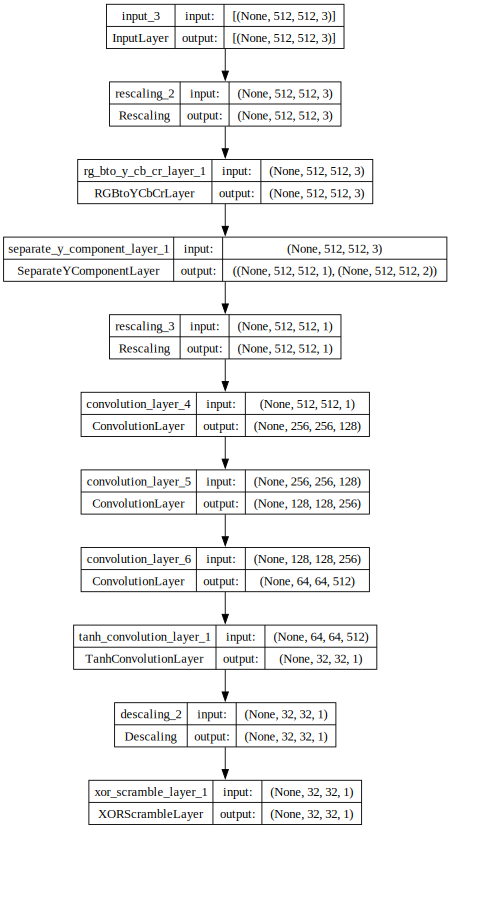

In [8]:
SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))